<h1 align=center> Credit Risk Prediction </h1>

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from  sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
data = pd.read_csv('./Credit risk classification.csv')
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


this dataset contains individuals credit history, credit score, income, loan amount, loan term, payment history,etc. Target is whether the borrower defaulted on their loan or credit obligation.0-Default:the borrower failed to meet their financial obligations. 1-Non-default:the borrower successfully fulfilled their financial obligations.

In [3]:
le = LabelEncoder()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [5]:
data.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [6]:
data.drop(columns='id',inplace=True)

In [7]:
# null values are replacing with mean
data.fea_2.fillna(data.fea_2.mean(),inplace=True)

In [8]:
data.head()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141


In [9]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

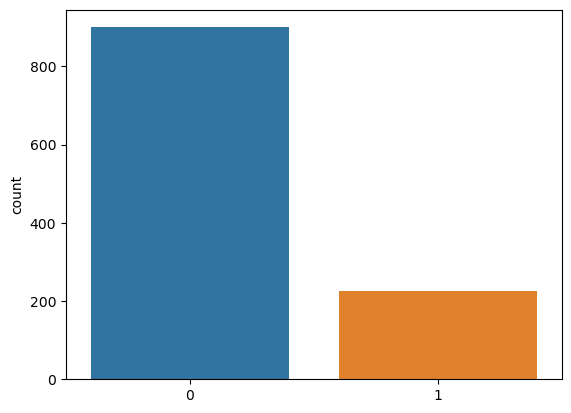

In [10]:
sns.countplot(x=y)
plt.show()

In [11]:
#treating class imbalance
from imblearn.over_sampling import SMOTE
x,y = SMOTE().fit_resample(x,y)

In [12]:
sc = StandardScaler()

In [13]:
x = sc.fit_transform(x)

In [14]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [15]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    print("mean score:",np.mean(scores)*100)
    print("*"*100)

cross validation model:LogisticRegression
mean score: 61.0
****************************************************************************************************
cross validation model:DecisionTreeClassifier
mean score: 78.66666666666666
****************************************************************************************************
cross validation model:RandomForestClassifier
mean score: 86.38888888888889
****************************************************************************************************
cross validation model:AdaBoostClassifier
mean score: 81.55555555555554
****************************************************************************************************
cross validation model:GradientBoostingClassifier
mean score: 84.6111111111111
****************************************************************************************************
cross validation model:KNeighborsClassifier
mean score: 75.1111111111111
************************************************************

###### selecting RandomForestClassifier

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(x_train,y_train)
print("Model terained with Logistic regression")
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model terained with Logistic regression
Model accuracy on train is: 1.0
Model accuracy on test is : 0.875
confusion_matrix train is: [[714   0]
 [  0 726]]
Confusion_matrix test is [[175  11]
 [ 34 140]]
wrong predictions made: (45, '/', 360)


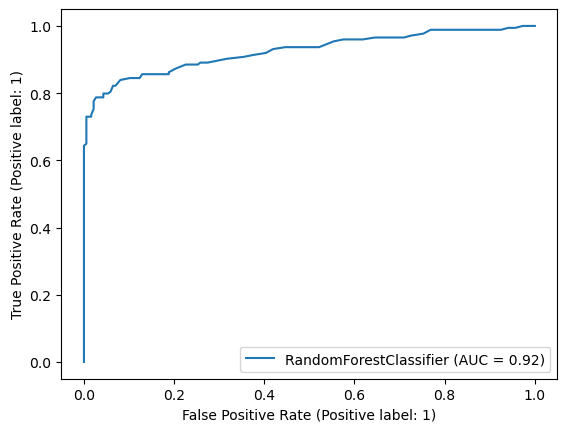

In [19]:
roc_display = RocCurveDisplay.from_estimator(model,x_test,y_test)